<a href="https://colab.research.google.com/github/fpiedra47/kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
wine = pd.read_csv("/content/drive/My Drive/CodingDojo/Codigos/week8/modified_wine.csv")
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [6]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df)

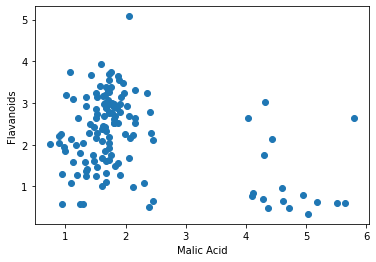

In [7]:
# Visualizar datos
plt.scatter(df['malic_acid'], df['flavanoids'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids');

In [8]:
# Instanciar KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


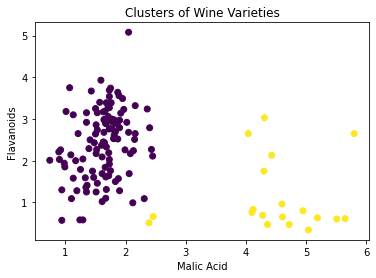

In [9]:
# Guarde las etiquetas del clúster en el marco de datos 
df['cluster'] = kmeans.labels_
# Visualiza los clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

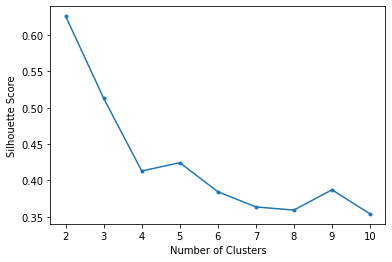

In [14]:
# Visualiza diferentes puntuaciones de silueta
# Guardar las puntuaciones de silueta para varios números de clúster en la lista
from sklearn.metrics import silhouette_score
#Valor de la silueta para KMeans
#En algoritmos como KMeans, una de las cosas que podemos hacer para determinar el mejor número de clústeres es observar la puntuación de silueta de modelos con diferentes números de clústeres.
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [15]:
# Según el gráfico anterior, ¿cuál es el mejor número de conglomerados para estos datos? (¡Recuerda que las puntuaciones de silueta más altas son mejores!)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.6256358724826118

In [18]:
# Consultar la puntuación de silueta de agrupación jerárquica
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#Valor de la silueta para agrupación jerárquica
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

0.6397847301130692

In [19]:
# Ver puntuación de silueta DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

0.539026265340761

**DBSCAN**

In [11]:
# Crear una instancia y ajustar la agrupación en clústeres: esto se hace en un solo paso para DBSCANcopy
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


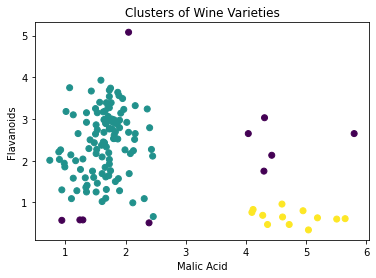

In [12]:
# Guardar las etiquetas del clúster en el marco de datos
df['cluster'] = dbs.labels_
# Visualizar los clústers
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');